In [1]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv("perfect_insurance_dataset.csv")
df

,Age,Annual_Income,Claim_History,Risk_Score,Fraud_Label,Premium_Amount,Claim_Amount,Policy_Type,Gender
0,56,114703,3,Medium,0,7729,7833,Life,Female
1,69,182697,3,Medium,0,10487,16709,Property,Female
2,46,158557,4,Medium,0,9398,17677,Auto,Male
3,32,57076,6,High,0,4370,8105,Life,Male
4,60,225877,5,High,0,13314,28287,Life,Male
...,...,...,...,...,...,...,...,...,...
4995,67,205400,1,Low,0,13868,18676,Auto,Male
4996,55,207274,3,Medium,0,14737,23643,Life,Female
4997,44,201236,0,Low,0,12400,19341,Life,Female
4998,51,156545,5,High,0,10166,25222,Health,Male


In [5]:
df.isnull().sum()

Age               0
Annual_Income     0
Claim_History     0
Risk_Score        0
Fraud_Label       0
Premium_Amount    0
Claim_Amount      0
Policy_Type       0
Gender            0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             5000 non-null   int64 
 1   Annual_Income   5000 non-null   int64 
 2   Claim_History   5000 non-null   int64 
 3   Risk_Score      5000 non-null   object
 4   Fraud_Label     5000 non-null   int64 
 5   Premium_Amount  5000 non-null   int64 
 6   Claim_Amount    5000 non-null   int64 
 7   Policy_Type     5000 non-null   object
 8   Gender          5000 non-null   object
dtypes: int64(6), object(3)
memory usage: 351.7+ KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,46.6728,16.630005,18.0,32.00,47.0,61.00,75.0
Annual_Income,5000.0,139372.1536,63612.845183,30060.0,84294.75,138987.0,193190.75,249977.0
Claim_History,5000.0,2.9570,2.017713,0.0,1.00,3.0,5.00,6.0
Fraud_Label,5000.0,0.0490,0.215890,0.0,0.00,0.0,0.00,1.0
Premium_Amount,5000.0,9044.0344,4339.228243,1555.0,5354.75,8893.5,12376.75,19965.0
Claim_Amount,5000.0,18232.5956,14138.794137,1739.0,9183.25,15304.5,23008.00,99334.0


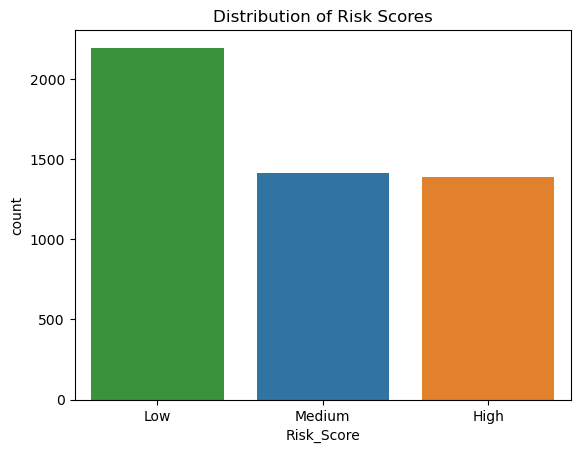

In [11]:
#EDA
#univariate analysis
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Risk_Score',hue='Risk_Score', order=['Low', 'Medium', 'High'])
plt.title("Distribution of Risk Scores")
plt.show()


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Annual_Income'}>],
       [<Axes: title={'center': 'Claim_History'}>,
        <Axes: title={'center': 'Premium_Amount'}>],
       [<Axes: title={'center': 'Claim_Amount'}>, <Axes: >]], dtype=object)

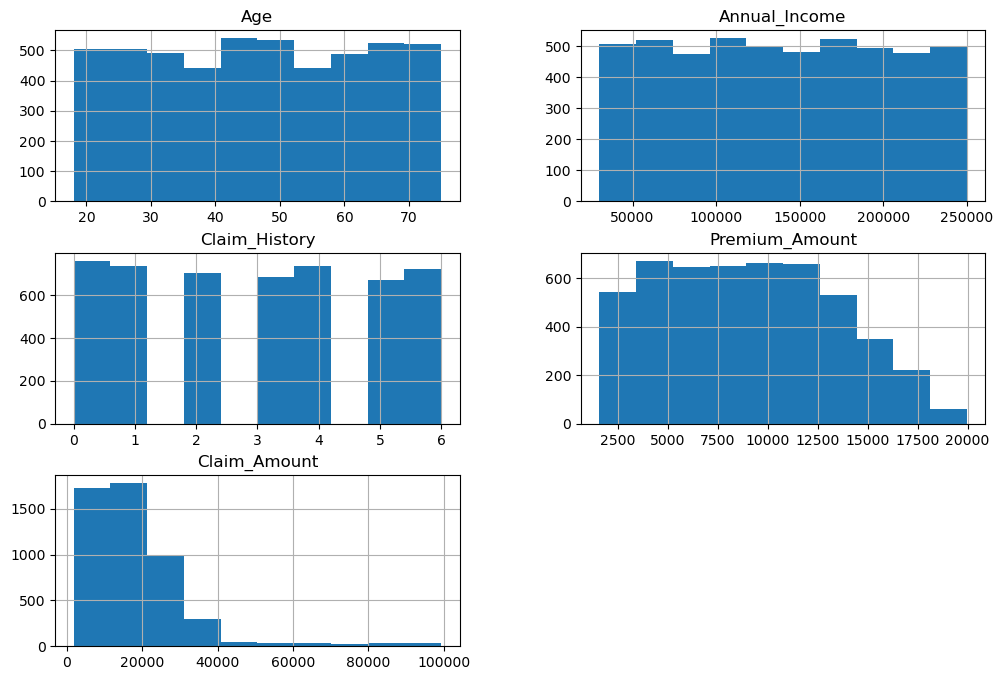

In [13]:
numerical_features = ['Age', 'Annual_Income', 'Claim_History', 'Premium_Amount', 'Claim_Amount']
df[numerical_features].describe()
df[numerical_features].hist(bins=10, figsize=(12, 8))

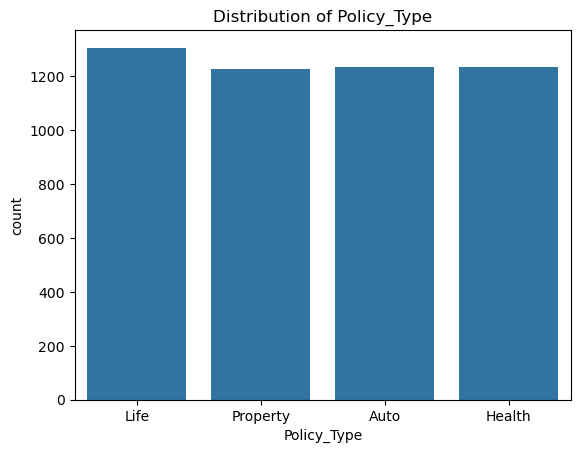

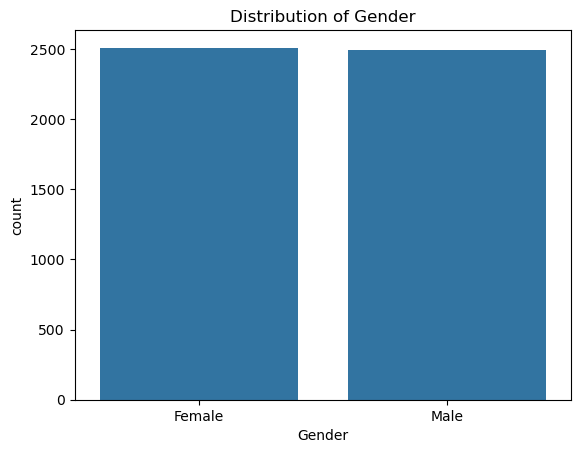

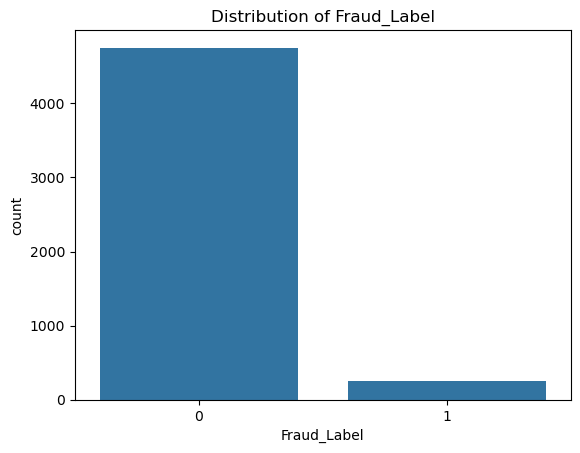

In [15]:
categorical_features = ['Policy_Type', 'Gender', 'Fraud_Label']
for col in categorical_features:
    sns.countplot(data=df, x=col)
    plt.title(f"Distribution of {col}")
    plt.show()

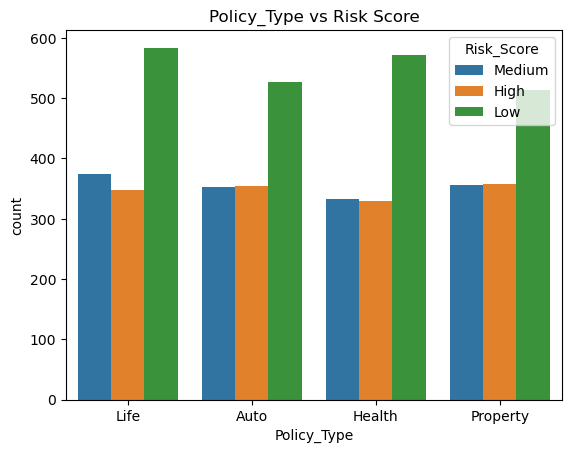

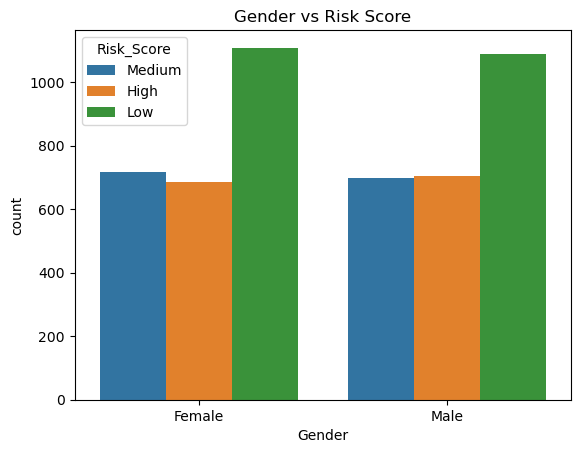

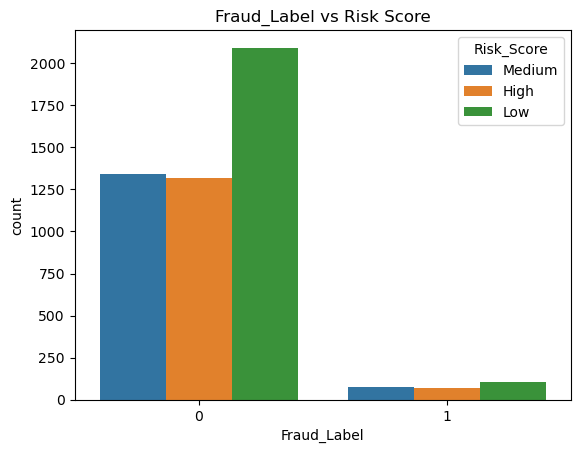

In [17]:
#bivariate analysis
for col in ['Policy_Type', 'Gender', 'Fraud_Label']:
    sns.countplot(data=df, x=col, hue='Risk_Score', order=df[col].value_counts().index)
    plt.title(f"{col} vs Risk Score")
    plt.show()

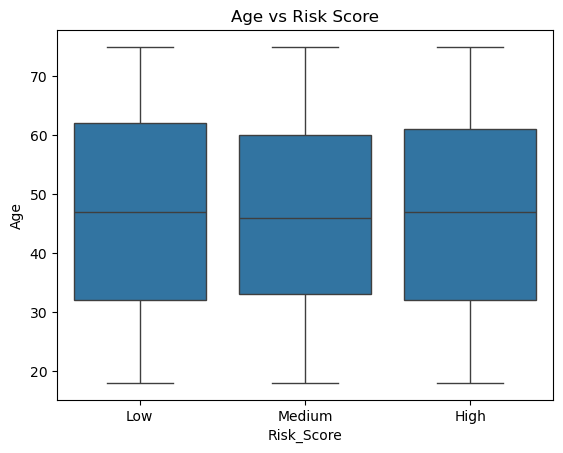

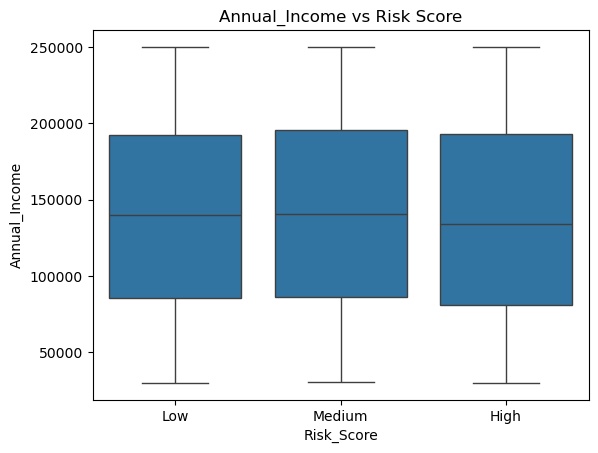

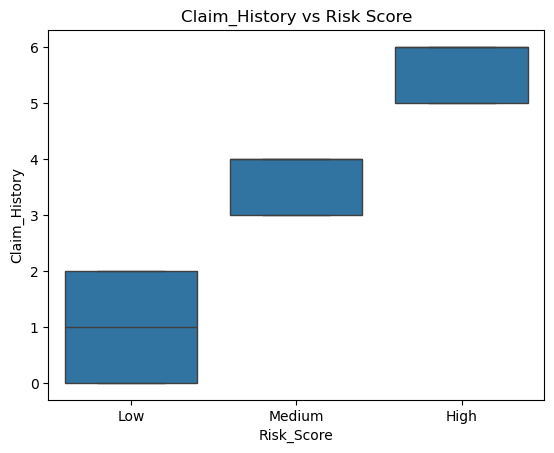

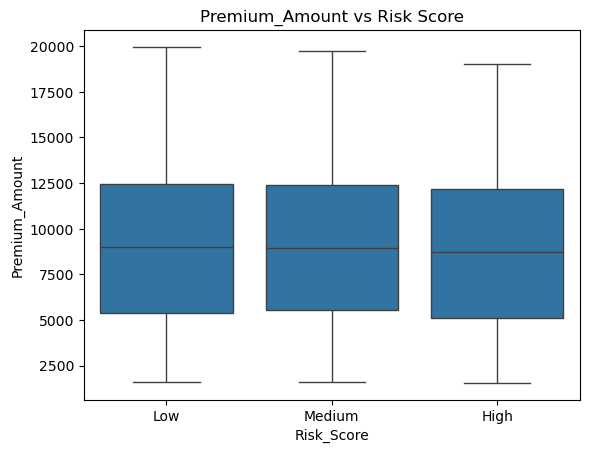

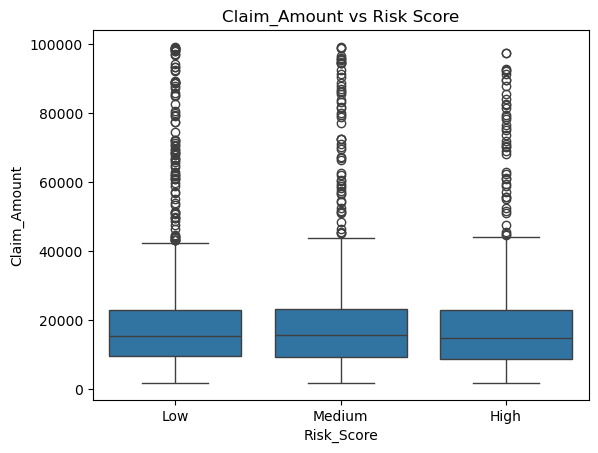

In [19]:
for col in numerical_features:
    sns.boxplot(data=df, x='Risk_Score', y=col, order=['Low', 'Medium', 'High'])
    plt.title(f"{col} vs Risk Score")
    plt.show()


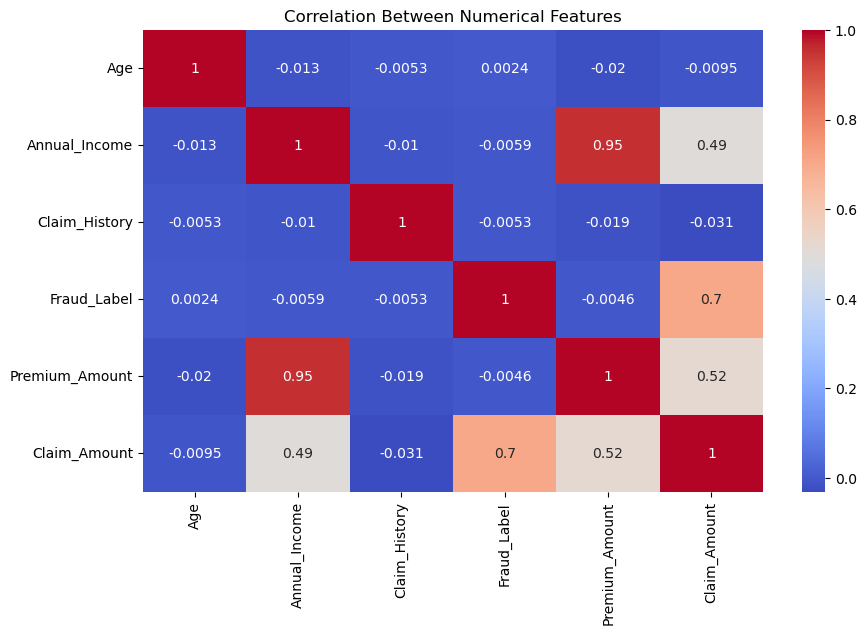

In [21]:
#multivariate analysis

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Between Numerical Features")
plt.show()


In [23]:
# outlier detection

Q1 = df['Claim_Amount'].quantile(0.25)
Q3 = df['Claim_Amount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Claim_Amount'] < lower_bound) | (df['Claim_Amount'] > upper_bound)]
print(f"Number of outliers in Claim_Amount: {outliers.shape[0]}")


Number of outliers in Claim_Amount: 186


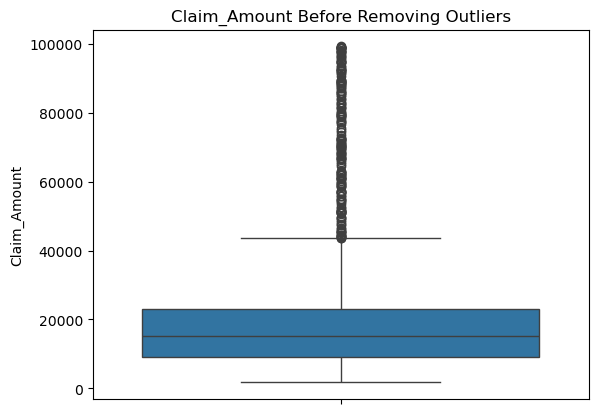

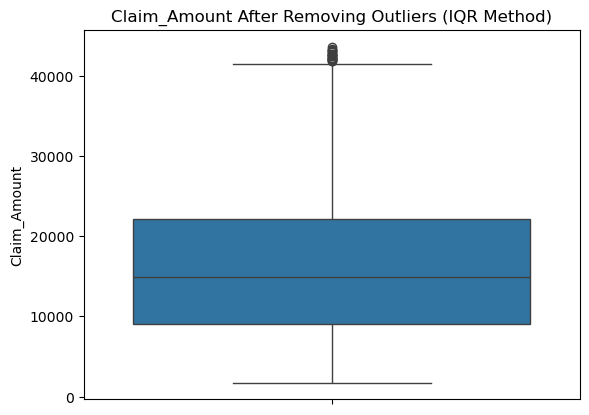

In [25]:
# Before
sns.boxplot(data=df, y='Claim_Amount')
plt.title("Claim_Amount Before Removing Outliers")
plt.show()

# After removing outliers
df_no_outliers = df[(df['Claim_Amount'] >= lower_bound) & (df['Claim_Amount'] <= upper_bound)]

sns.boxplot(data=df_no_outliers, y='Claim_Amount')
plt.title("Claim_Amount After Removing Outliers (IQR Method)")
plt.show()


In [27]:
x=df[['Age','Annual_Income','Claim_History','Claim_Amount','Fraud_Label','Premium_Amount','Policy_Type','Gender']]
x

,Age,Annual_Income,Claim_History,Claim_Amount,Fraud_Label,Premium_Amount,Policy_Type,Gender
0,56,114703,3,7833,0,7729,Life,Female
1,69,182697,3,16709,0,10487,Property,Female
2,46,158557,4,17677,0,9398,Auto,Male
3,32,57076,6,8105,0,4370,Life,Male
4,60,225877,5,28287,0,13314,Life,Male
...,...,...,...,...,...,...,...,...
4995,67,205400,1,18676,0,13868,Auto,Male
4996,55,207274,3,23643,0,14737,Life,Female
4997,44,201236,0,19341,0,12400,Life,Female
4998,51,156545,5,25222,0,10166,Health,Male


In [29]:
y=df[['Risk_Score']]
y

,Risk_Score
0,Medium
1,Medium
2,Medium
3,High
4,High
...,...
4995,Low
4996,Medium
4997,Low
4998,High


In [31]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

oh = OneHotEncoder(sparse_output=False)  
policy_encoded = oh.fit_transform(x[['Policy_Type']])
policy_df = pd.DataFrame(policy_encoded, columns=oh.get_feature_names_out(['Policy_Type'])).astype(int)

x = x.drop(columns=['Policy_Type']).reset_index(drop=True)
x = pd.concat([x, policy_df], axis=1)

gender_encoded=oh.fit_transform(x[['Gender']])
gender_df=pd.DataFrame(gender_encoded,columns=oh.get_feature_names_out(['Gender'])).astype(int)
x=x.drop(columns=['Gender']).reset_index(drop=True)
x=pd.concat([x,gender_df],axis=1)

In [33]:
x

,Age,Annual_Income,Claim_History,Claim_Amount,Fraud_Label,Premium_Amount,Policy_Type_Auto,Policy_Type_Health,Policy_Type_Life,Policy_Type_Property,Gender_Female,Gender_Male
0,56,114703,3,7833,0,7729,0,0,1,0,1,0
1,69,182697,3,16709,0,10487,0,0,0,1,1,0
2,46,158557,4,17677,0,9398,1,0,0,0,0,1
3,32,57076,6,8105,0,4370,0,0,1,0,0,1
4,60,225877,5,28287,0,13314,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,67,205400,1,18676,0,13868,1,0,0,0,0,1
4996,55,207274,3,23643,0,14737,0,0,1,0,1,0
4997,44,201236,0,19341,0,12400,0,0,1,0,1,0
4998,51,156545,5,25222,0,10166,0,1,0,0,0,1


In [35]:
df['Risk_Score'] = df['Risk_Score'].replace({'Low': 0, 'Medium': 1, 'High': 2})

C:\Users\SukilPriya\AppData\Local\Temp\ipykernel_18492\2032465085.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Risk_Score'] = df['Risk_Score'].replace({'Low': 0, 'Medium': 1, 'High': 2})


In [37]:
df['Risk_Score']

0       1
1       1
2       1
3       2
4       2
       ..
4995    0
4996    1
4997    0
4998    2
4999    2
Name: Risk_Score, Length: 5000, dtype: int64

In [39]:
df['Risk_Score'].value_counts()

Risk_Score
0    2196
1    1415
2    1389
Name: count, dtype: int64

In [41]:
from sklearn.preprocessing import MinMaxScaler
s=MinMaxScaler()
x_scaled=s.fit_transform(x)

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,classification_report
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [45]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

ypred = model.predict(x_test)
full_report = classification_report(ypred,y_test)

print(full_report)

C:\Users\SukilPriya\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


              precision    recall  f1-score   support

        High       1.00      1.00      1.00       275
         Low       1.00      1.00      1.00       440
      Medium       1.00      1.00      1.00       285

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



In [47]:
x

,Age,Annual_Income,Claim_History,Claim_Amount,Fraud_Label,Premium_Amount,Policy_Type_Auto,Policy_Type_Health,Policy_Type_Life,Policy_Type_Property,Gender_Female,Gender_Male
0,56,114703,3,7833,0,7729,0,0,1,0,1,0
1,69,182697,3,16709,0,10487,0,0,0,1,1,0
2,46,158557,4,17677,0,9398,1,0,0,0,0,1
3,32,57076,6,8105,0,4370,0,0,1,0,0,1
4,60,225877,5,28287,0,13314,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,67,205400,1,18676,0,13868,1,0,0,0,0,1
4996,55,207274,3,23643,0,14737,0,0,1,0,1,0
4997,44,201236,0,19341,0,12400,0,0,1,0,1,0
4998,51,156545,5,25222,0,10166,0,1,0,0,0,1


In [49]:
import numpy as np

# Input data (must match the same feature order as x used in training)
inputdata = (46, 158557, 4, 17677, 0, 9398, 1, 0, 0, 0, 0, 1)
inputdataasarray = np.asarray(inputdata).reshape(1, -1)

# Scale the input using the same scaler
inputdata_scaled = s.transform(inputdataasarray)

# Predict
prediction = model.predict(inputdata_scaled)
print(*prediction)


Medium


C:\Users\SukilPriya\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
#high_risk_input = (32, 119743, 6, 17378, 0, 7621, 1, 0, 0, 0, 1, 0)
#medium_risk_input = (46, 158557, 4, 17677, 0, 9398, 1, 0, 0, 0, 0, 1)
#low_risk_input = (67, 205400, 1, 18676, 0, 13868, 1, 0, 0, 0, 0, 1)

In [51]:
import pickle 
with open('riskClassification1.pkl','wb') as file:
    pickle.dump(model,file)

In [53]:
import pickle
with open('scalerrisk1.pkl', 'wb') as file:
    pickle.dump(s, file)